In [170]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
sns.set_context('paper')
pd.set_option('display.max_columns', None)

In [171]:
with open("../Data/simu3_design.pkl", 'rb') as inp:
    df = pickle.load(inp)
df = df.loc[df.session < 300]
df

,position,session,testidx,lag,type,study_itemno1,study_itemno2,test_itemno1,test_itemno2
0,1,0,40,0,-1,708,1244,589,984
1,2,0,91,0,-1,751,680,603,433
2,3,0,131,0,-1,823,1591,709,-1
3,4,0,2,2,0,880,1325,384,-1
4,5,0,87,0,-1,51,1505,11,735
...,...,...,...,...,...,...,...,...,...
47995,156,299,152,4,3,677,1211,890,1117
47996,157,299,153,4,3,1462,1416,890,1579
47997,158,299,156,2,2,1412,24,677,1211
47998,159,299,151,8,1,925,390,12,-1


### Run CMR-IA

In [172]:
# s_mat = np.load("../Data/simu3_smat.npy")

In [173]:
s_mat = np.load('../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [174]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.1,
    beta_cue = 0.3, # 0.4
    beta_rec_post = 0.1,
    gamma_fc = 0.1,
    s_fc = 0.1,
    c_thresh_itm = 0.22,
    c_thresh_ass = 0.27,
    d_ass = 0.5,
)
params

{'beta_enc': 0.1,
 'beta_rec': 0.5,
 'beta_cue': 0.3,
 'beta_rec_post': 0.1,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.1,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.5,
 'c_thresh_itm': 0.22,
 'c_thresh_ass': 0.27,
 'd_ass': 0.5,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.1,
 'gamma_cf': 0.5}

In [175]:
# pos_b = np.arange(0,1,0.05)
# csim_old = []
# csim_new = []
# for b in pos_b:
#     # print(b)
#     params.update(beta_enc = b)
#     df_simu = cmr.run_hockley_recog_multi_sess(params,df,s_mat)
#     df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
#     old = df_simu.loc[df_simu.type == 1].csim.mean()
#     new = df_simu.loc[df_simu.type == 0].csim.mean()
#     csim_old.append(old)
#     csim_new.append(new)
# df_tmp = pd.DataFrame(data = {'b':pos_b, 'old':csim_old, 'new':csim_new})
# sns.lineplot(data=df_tmp, x='b', y='old', linewidth=2)
# sns.lineplot(data=df_tmp, x='b', y='new', linewidth=2)

In [176]:
df_simu = cmr.run_conti_recog_multi_sess(params, df, s_mat, mode="Hockley")
df_simu

CMR Time: 105.49532961845398


,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim
0,0,1,708,1244,589,984,0.0,46.288776,0.014876
1,0,2,751,680,603,433,0.0,151.675507,0.074218
2,0,3,823,1591,709,-1,0.0,81.418739,0.043112
3,0,4,880,1325,384,-1,0.0,285.085663,0.105771
4,0,5,51,1505,11,735,0.0,342.506775,0.114946
...,...,...,...,...,...,...,...,...,...
47995,299,156,677,1211,890,1117,1.0,779.971558,0.283906
47996,299,157,1462,1416,890,1579,1.0,415.602264,0.315382
47997,299,158,1412,24,677,1211,1.0,106.005974,0.383694
47998,299,159,925,390,12,-1,1.0,546.301758,0.301710


In [177]:
df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,testidx,lag,type
0,0,1,708,1244,589,984,0.0,46.288776,0.014876,40,0,-1
1,0,2,751,680,603,433,0.0,151.675507,0.074218,91,0,-1
2,0,3,823,1591,709,-1,0.0,81.418739,0.043112,131,0,-1
3,0,4,880,1325,384,-1,0.0,285.085663,0.105771,2,2,0
4,0,5,51,1505,11,735,0.0,342.506775,0.114946,87,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
47995,299,156,677,1211,890,1117,1.0,779.971558,0.283906,152,4,3
47996,299,157,1462,1416,890,1579,1.0,415.602264,0.315382,153,4,3
47997,299,158,1412,24,677,1211,1.0,106.005974,0.383694,156,2,2
47998,299,159,925,390,12,-1,1.0,546.301758,0.301710,151,8,1


In [178]:
df_simu.groupby(['type','lag']).csim.mean()

type  lag
-1    0      0.160697
 0    2      0.181564
      4      0.185286
      6      0.185929
      8      0.186185
      16     0.186005
 1    2      0.307173
      4      0.290374
      6      0.282543
      8      0.279189
      16     0.253747
 2    2      0.326746
      4      0.316676
      6      0.308323
      8      0.304476
      16     0.283680
 3    2      0.309224
      4      0.301890
      6      0.297151
      8      0.300287
      16     0.274632
Name: csim, dtype: float64

### PLOT

In [179]:
df_laggp = df_simu.groupby(['type','lag']).s_resp.mean().to_frame(name='yes_rate').reset_index()
df_laggp['no_rate'] = 1 - df_laggp['yes_rate'] 
df_laggp

,type,lag,yes_rate,no_rate
0,-1,0,0.171187,0.828813
1,0,2,0.265967,0.734033
2,0,4,0.296961,0.703039
3,0,6,0.293054,0.706946
4,0,8,0.294595,0.705405
5,0,16,0.292742,0.707258
6,1,2,0.935351,0.064649
7,1,4,0.891842,0.108158
8,1,6,0.848681,0.151319
9,1,8,0.827749,0.172251


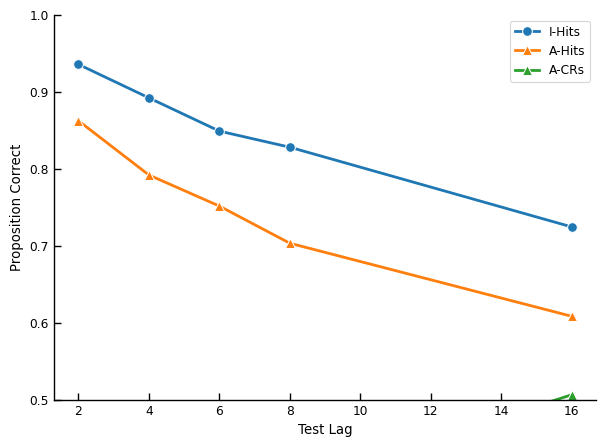

In [180]:
fig, ax = plt.subplots(figsize=(7,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_laggp.loc[df_laggp.type == 1], x='lag', y='yes_rate', linewidth=2, marker='o', markersize = 7, label='I-Hits')
sns.lineplot(data=df_laggp.loc[df_laggp.type == 2], x='lag', y='yes_rate', linewidth=2, marker='^', markersize = 7, label='A-Hits')
sns.lineplot(data=df_laggp.loc[df_laggp.type == 3], x='lag', y='no_rate', linewidth=2, marker='^', markersize = 7, label='A-CRs')
plt.ylim([0.5,1])
plt.xlabel('Test Lag')
plt.ylabel('Proposition Correct')
# plt.savefig('fig/simu3_hr.pdf')
plt.show()

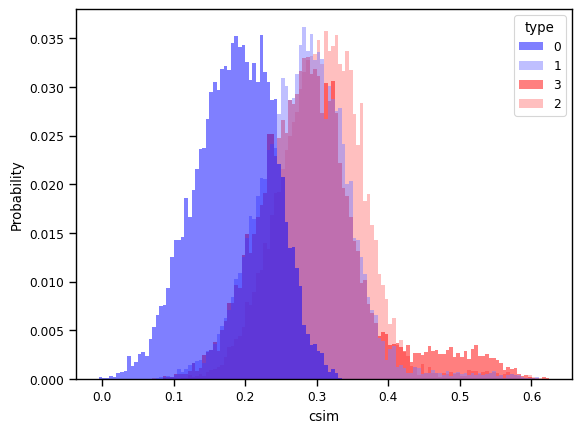

In [181]:
sns.histplot(data=df_simu, x="csim", hue = "type", hue_order = [0,1,3,2], palette = [[0,0,1],[0.5,0.5,1],[1,0,0],[1,0.5,0.5]], stat = "probability", binwidth = 0.005, common_norm=False, edgecolor = None)
# plt.savefig('fig/simu3_csim.pdf')
plt.show()

In [182]:
df_dprime = pd.DataFrame()
df_dprime['lag'] = [2,4,6,8,16]
df_dprime['I_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 1, 'yes_rate'].astype(float))
df_dprime['I_z_far'] = np.mean(sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 0, 'yes_rate'].astype(float)))
df_dprime['I_dprime'] = df_dprime['I_z_hr'] - df_dprime['I_z_far']
df_dprime['A_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 2, 'yes_rate'].astype(float))
df_dprime['A_z_far'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 3, 'yes_rate'].astype(float))
df_dprime['A_dprime'] = df_dprime['A_z_hr'] - df_dprime['A_z_far']
df_dprime

,lag,I_z_hr,I_z_far,I_dprime,A_z_hr,A_z_far,A_dprime
0,2,1.516874,-0.557621,2.074495,1.089874,0.595270,0.494604
1,4,1.236385,-0.557621,1.794006,0.812218,0.371526,0.440692
2,6,1.030793,-0.557621,1.588414,0.678603,0.260739,0.417863
3,8,0.945307,-0.557621,1.502928,0.533207,0.282550,0.250657
4,16,0.595574,-0.557621,1.153194,0.274635,-0.015520,0.290154


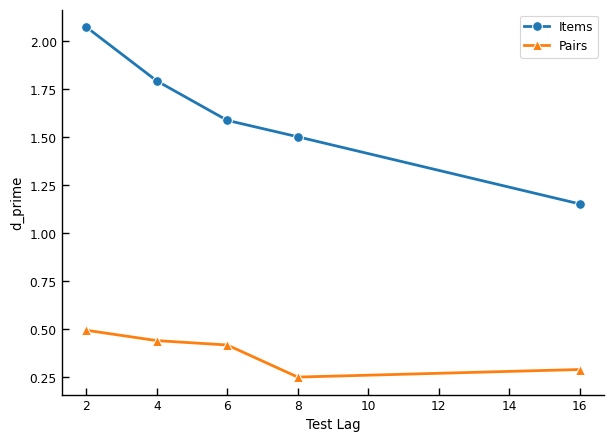

In [183]:
fig, ax = plt.subplots(figsize=(7,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_dprime, x='lag', y='I_dprime', linewidth=2, marker='o', markersize = 7, label='Items')
sns.lineplot(data=df_dprime, x='lag', y='A_dprime', linewidth=2, marker='^', markersize = 7, label='Pairs')
plt.ylabel('d_prime')
plt.xlabel('Test Lag')
# plt.savefig('fig/simu3_dprime.pdf')
plt.show()